### Question 1 : 

$$
K \left(x_N-\frac{L}{2} \right)^2+dx^2  \sum_{i=0}^{N} y_i^2
$$
Le coût (4) contient deux choses distinctes à minimiser :

$ K(x_N-\frac{L}{2})^2+dx^2 $ : La distance entre le bout du tuyau et le parterre à partir duquel on doit arroser. Cette partie du coût remplace la condition $x_N = \frac{L}{2}$ (voir question 2)

$ dx^2\sum_{i=0}^{N} y_i^2 $ : C'est la somme quadratique des écarts à l'axe décrit par le trajet en ligne droite, de chaque points utilisés pour décrire le tuyeau. Cette somme représente l'encombrement du tuyau dans le jardin : pour le minimiser, il faut placer le tuyau d'arrosage le plus proche possible du trajet en ligne droite entre le robinet et le pareterre. (Cette somme est pondérée par $dx^2$ : plus il est grand, c'est à dire moins on utilise de points pour décrire le tuyau, plus la somme quadratique doit être petite). 

On veut donc avec le coût (4) minimiser l'encombrement et la distance entre le bout du tuyau et le parterre ou il doit être ne théorie. 

### Question 2 :  

Si on impose $ x_N = L/2 $ dans la liste des contraintes, on devrait donner des conditions initiales vérifiant déjà cette condition. Ce qui n'est pas simple car il faut que chaque point soit espacé d'une distance fixe, et que la longueur du tuyau soit également fixe. 

### Question 3 : 

La courbure du tuyau au point $M$ appartenant à la courbe est donnée, par $ \frac{d^2\vec{M}}{dx^2} $ de norme au carré $ ||\frac{d^2\vec{M}}{dx^2}||^2 = \left( \frac{d^2x_M}{dx^2} \right)^2 + \left(\frac{d^2y_M}{dx^2} \right)^2 $ 

Si on se place maintenant au point $ (x_i, y_i) $ et qu'on se place dans le cas discret, donc on applique une méthode de différence finie on obtient :
$ ||\frac{d^2\vec{M}}{dx^2}|_{(x_i, y_i)}||^2 \approx (\frac{x_{i+1}-2x_{i}+x_{i-1}}{dx^2})^2 + (\frac{y_{i+1}-2y_{i}+y_{i-1}}{dx^2})^2 = \frac{(x_{i+1}-2x_{i}+x_{i-1})^2}{dx^4} + \frac{(y_{i+1}-2y_{i}+y_{i-1})^2}{dx^4}  $

Si on veut limiter cette courbure de telle sorte que $ ||\frac{d^2\vec{M}}{dx^2}|_{(x_i, y_i)}|| \le \gamma, \space \forall i \in [1,N] $ 

On trouve alors la condition :

$(x_{i+1}-2x_{i}+x_{i-1})^2 + (y_{i+1}-2y_{i}+y_{i-1})^2 \le dx^4 \gamma ^2, \space \forall i \in [1,N] $

### Question 4 : 

On pose $ z = (x_0, ..., x_N, y_0, ..., y_N) \in \mathbb{R}^{2N+2} $ 
On a 
$$
c_{eq}(z) = \begin{pmatrix} 
x_0 \\ y_0 \\ y_N \\ (x_1-x_0)^2 + (y_1-y_0)^2 - dx^2 \\ \vdots \\ (x_N-x_{N-1})^2 + (y_N-y_{N-1})^2 - dx^2 
\end{pmatrix} \in \mathbb{R}^{N+3}
$$
et
$$
c_{ineq}(z) = \begin{pmatrix} 
-y_1 \\ x_0-x_1 \\ \vdots \\ x_{N-1}-x_{N} \\ (x_{2}-2x_{1}+x_{0})^2 + (y_{2}-2y_{1}+y_{0})^2 - dx^4 \gamma ^2 \\ \vdots \\ (x_{N}-2x_{N-1}+x_{N-2})^2 + (y_{N}-2y_{N-1}+y_{N-2})^2 - dx^4 \gamma ^2 \end{pmatrix} \in \mathbb{R}^{2N}
$$

Ce qui représente au total N+3 condition d'égalité et 2N d'intégalité soit 3N+3 conditions.

et enfin :
$$
f(z) = K \left(x_N-\frac{L}{2} \right)^2+dx^2  \sum_{i=0}^{N} y_i^2
$$

### Question 5



Le sujet concerné est un problème d'optimisation sous contraintes, différentiable et de dimension finie. Plusieurs méthodes pourrait être envisagées : 
* un algo de dualité, qui à l'aide du lagrangien nous permetterait de nous ramener à un problème d'optimisation sans contraintes (on pourrait alors utiliser les algos de type descente de gradient, Newton, quasi-newton...).
* un algo utilisant un système de pénalité interieures.
* un algo de programmation quadratique. 

Cependant, peu de solveurs reconnus utilisent la dualité, nous aurions du en coder un nous même, et au vu du temps imparti, celui ci aurait été moins bien optimisé, que d'autres solveurs disponibles directement à partir de librairies. 
Ensuite, les algos de programation quadratique nécéssitent exclusivement des contraintes affines ; ce n'est pas notre cas, nous ne pouvons donc pas utiliser ce type d'algorithme. 
Nous avons donc choisi un algo utilisant un système de pénalité interieures (ipopt disponible depuis la librairie casadi), car il fonctionne avec nos contraintes et est simple d'utilisation (gain de temps). 



### Question 6

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from casadi import *

In [2]:
def solve(N, K, L, gamma, x0, y0) :#fonction de résolution
    
    dx = L/N
    
    opti = casadi.Opti()
    x = opti.variable(N+1) # l'utilisation de deux variables est plus clair qu'avec une seule mais ne change rien à la
    y = opti.variable(N+1) # généralité du problème
    
    #bulding f
    S = 0
    for i in range(N+1) :
        S += y[i]**2

    f = K*(x[N] - 5)**2 + S * dx**2
    opti.minimize(f)

    #ceq
    opti.subject_to(x[0] == 0)
    opti.subject_to(y[0] == 0)
    opti.subject_to(y[N] == 0)
    opti.subject_to((x[1] - x[0])**2 + (y[1] - y[0])**2 - dx**2 == 0)
    
    #cineq
    opti.subject_to( y[1] >= 0)
    opti.subject_to( x[0] - x[1] <= 0)
    
    for i in range(1,N) :
        
        #ceq(bis)
        opti.subject_to( (x[i+1] - x[i])**2 + (y[i+1] - y[i])**2 - dx**2 == 0) 
        
        #cineq(bis)
        opti.subject_to( x[i] - x[i+1] <= 0)
        opti.subject_to((x[i+1] - 2 * x[i] + x[i-1])**2 + (y[i + 1] - 2* y[i]+ y[i-1])**2 - (dx**4)*(gamma**2) <= 0)
    
    
    
    #solving
    opti.set_initial(x, x0)
    opti.set_initial(y, y0)
    opti.solver('ipopt')
    sol = opti.solve()
    return sol.value(x), sol.value(y)
    

In [3]:
N = 60
K = 10
L = 10
gamma = 3

eps = 10**-7 # used to add an extra point on arange array

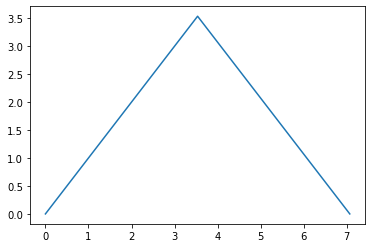

In [4]:

# z0 = np.arange(2 * N + 2, dtype = 'float64')
def generate_init_tri(N, L) : #on génère la condition initiale demandée
    dx = L/N

    x0 = np.arange(0, L/np.sqrt(2)+eps, dx/np.sqrt(2))

    y0 = np.empty(N+1)
    y0[: N//2 + 1] = np.arange(0,L/(2*np.sqrt(2))+eps,dx/np.sqrt(2))
    y0[ N//2 + 1:  ] = L/(2*np.sqrt(2)) - np.arange(dx/np.sqrt(2), L/(2*np.sqrt(2)) + eps, dx/np.sqrt(2))
    
    return x0, y0


x0, y0 = generate_init_tri(N, L)
plt.plot(x0, y0)



In [5]:
#on résout
x, y = solve(N, K, L, gamma, x0, y0)



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

  91 3.9479462e-001 1.47e-003 3.75e-002  -3.8 8.88e-002  -0.4 1.00e+000 7.72e-001h  1
  92 3.8583563e-001 5.57e-004 2.57e-002  -3.8 3.02e-002   0.0 1.00e+000 1.00e+000f  1
  93 3.8168990e-001 5.05e-004 9.95e-002  -3.8 3.20e-002  -0.4 1.00e+000 5.01e-001h  1
  94 3.7819062e-001 2.89e-004 2.87e-003  -3.8 2.06e-002  -0.9 1.00e+000 1.00e+000f  1
  95 3.7825869e-001 7.57e-005 3.48e-003  -3.8 9.54e-003  -0.5 1.00e+000 1.00e+000h  1
  96 3.7790978e-001 1.04e-004 3.03e-002  -3.8 5.58e-002  -1.0 4.49e-001 2.36e-001h  2
  97 3.7717507e-001 3.96e-005 3.92e-003  -3.8 1.03e-002  -0.5 1.00e+000 1.00e+000h  1
  98 3.7567560e-001 4.00e-004 4.47e-002  -3.8 5.10e-002  -1.0 7.10e-001 8.75e-001h  1
  99 3.7458259e-001 7.88e-005 6.64e-002  -3.8 1.91e-002  -0.6 8.21e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 3.7376780e-001 9.78e-006 5.69e-003  -3.8 6.68e-003  -0.2 1.00e+000 1.00e+000h  1
 101 3.7185250e-001 1.49e-004 6.15e-003  -3.8 2.59e-002  -0

(-0.2500830931183997,
 5.251744955486394,
 -0.5180828775675024,
 0.5675964307223804)

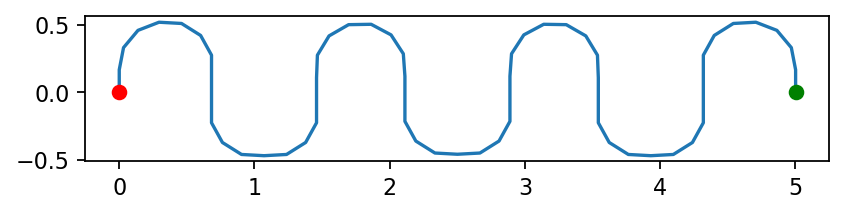

In [6]:
#et on trace la courbe
plt.figure(figsize = (6,1.2), dpi = 160)

plt.plot(x, y, '-')
plt.plot([0], [0], 'or')
plt.plot(x[N], y[N], 'og')
plt.axis('equal')

### Question 7

In [7]:
#on effectue deux résolutions supplémentaires avec des K différents
K = 100
x2, y2 = solve(N, K, L, gamma, x0, y0)

K = 10**5
x3, y3 = solve(N, K, L, gamma, x0, y0)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      119

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

 109 4.7130217e-001 9.74e-003 2.77e-001  -2.5 3.72e-001    -  5.47e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 4.5549164e-001 5.33e-003 1.34e-001  -2.5 1.24e-001    -  7.32e-001 1.00e+000h  1
 111 4.4287122e-001 2.95e-003 3.50e-002  -2.5 8.94e-002  -2.2 1.00e+000 1.00e+000h  1
 112 4.3556806e-001 6.48e-004 5.83e-002  -2.5 2.54e-001    -  7.64e-001 7.56e-001H  1
 113 4.3748974e-001 5.99e-004 4.27e-003  -2.5 7.79e-002    -  1.00e+000 1.00e+000f  1
 114 4.3540040e-001 1.16e-004 4.84e-002  -3.8 2.38e-002    -  9.60e-001 1.00e+000h  1
 115 4.1764395e-001 6.45e-004 2.15e-003  -3.8 4.79e-002  -1.8 1.00e+000 1.00e+000h  1
 116 4.1634826e-001 6.44e-004 9.39e-002  -3.8 4.14e-001  -1.4 5.81e-001 4.99e-002h  2
 117 4.0918948e-001 5.13e-005 1.33e-003  -3.8 1.30e-002  -0.9 1.00e+000 1.00e+000h  1
 118 3.8850922e-001 1.81e-003 1.39e-002  -5.7 7.22e-002  -1.4 6.43e-001 9.76e-001h  1
 119 3.8254322e-001 3.90e-005 1.28e-002  -5.7 1.21e-002  -0

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      119

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

 111 7.1527265e+000 2.55e-004 3.41e-005  -5.7 5.54e-002  -3.2 1.00e+000 1.00e+000h  1
 112 6.5217742e+000 9.91e-004 3.04e-005  -5.7 1.42e-001  -3.7 1.00e+000 1.00e+000h  1
 113 6.3176223e+000 2.24e-003 2.01e-004  -5.7 5.08e-001  -4.2 1.73e-001 1.26e-001h  1
 114 5.9171029e+000 2.70e-003 2.44e-004  -5.7 1.72e-001  -3.8 1.00e+000 6.38e-001f  1
 115 5.6862834e+000 2.73e-004 3.16e-005  -5.7 5.68e-002  -3.3 1.00e+000 1.00e+000f  1
 116 5.0647921e+000 1.83e-003 1.45e-004  -5.7 1.70e-001  -3.8 7.38e-001 1.00e+000h  1
 117 4.7275855e+000 2.87e-003 1.59e-004  -5.7 6.38e-001  -4.3 1.65e-001 1.98e-001h  1
 118 4.3736972e+000 3.50e-003 2.21e-004  -5.7 2.38e-001  -3.9 4.33e-001 5.88e-001f  1
 119 4.1536049e+000 1.25e-003 2.78e-004  -5.7 7.07e-002  -3.4 6.01e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 4.0728688e+000 8.74e-005 2.83e-005  -5.7 2.82e-002  -3.0 1.00e+000 1.00e+000h  1
 121 3.8456252e+000 7.70e-004 2.76e-005  -5.7 8.08e-002  -3

(-0.2500830931183997,
 5.251744955486394,
 -0.8364484093633932,
 0.7091070870084559)

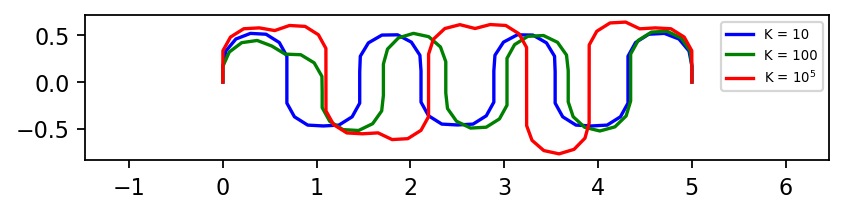

In [8]:
#on trace les courbes correspondantes sur le même graphique
plt.figure(figsize = (6,1.2), dpi = 160)

plt.plot(x, y, '-b', label = 'K = 10')
plt.plot(x2, y2, '-g', label = 'K = 100')
plt.plot(x3, y3, '-r', label = r'K = $10^5$')
# plt.plot([0], [0], 'or')
# plt.plot(x[N], y[N], 'og')
plt.legend(prop={'size': 6})
plt.axis('equal')

On observe sur le graphique précedent que plus on augmente K, c'est à dire moins on accorde d'importance à la deuxième partie de la fonction coût (celle qui mesure l'encombrement du tuyau dans le jardin), plus le tuyau prends de la place : le max des ordonnées des points décrivrant le tuyau est plus grand en valeur absolue. C'est donc cohérent. 

### Question 8

In [9]:
#On effectue des résolutions supplémentaires avec des N différents
K = 10**5

N = 160
x0, y0 = generate_init_tri(N, L)
x4, y4 = solve(N, K, L, gamma, x0, y0)

N = 260
x0, y0 = generate_init_tri(N, L)
x5, y5 = solve(N, K, L, gamma, x0, y0)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      643
Number of nonzeros in inequality constraint Jacobian.:     1275
Number of nonzeros in Lagrangian Hessian.............:      960

Total number of variables............................:      322
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      163
Total number of inequality constraints...............:      320
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      319

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

 113 4.0420474e+000 1.29e-005 3.40e-004  -8.6 1.59e-003  -2.2 1.00e+000 5.49e-001f  1
 114 4.0402764e+000 8.73e-006 3.34e-004  -8.6 5.74e-003  -2.7 5.47e-001 3.97e-001f  1
 115 4.0384725e+000 2.58e-006 8.27e-006  -8.6 1.55e-003  -2.3 1.00e+000 1.00e+000f  1
 116 4.0365695e+000 1.89e-005 6.25e-004  -8.6 7.34e-003  -2.8 1.00e+000 3.18e-001h  1
 117 4.0351345e+000 8.10e-006 1.38e-004  -8.6 1.65e-003  -2.3 1.00e+000 7.29e-001f  1
 118 4.0331956e+000 5.80e-005 1.64e-004  -8.6 2.28e-002  -2.8 1.64e-001 3.01e-001f  1
 119 4.0317337e+000 2.79e-005 6.23e-005  -8.6 2.18e-003  -2.4 5.91e-001 5.44e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 4.0289342e+000 3.88e-005 4.28e-004  -8.6 1.27e-002  -2.9 6.25e-001 3.42e-001f  1
 121 4.0277571e+000 2.46e-005 3.98e-004  -8.6 3.07e-003  -2.4 1.00e+000 4.08e-001f  1
 122 4.0247048e+000 3.63e-005 2.65e-004  -8.6 9.39e-003  -2.9 4.09e-001 3.44e-001f  1
 123 4.0236856e+000 1.83e-005 7.13e-004  -8.6 2.18e-003  -2

 247 3.5534943e+000 2.05e-004 9.64e-004  -8.6 6.64e-003  -2.9 6.16e-001 4.22e-001f  1
 248 3.5499890e+000 1.32e-004 1.31e-003  -8.6 2.53e-002  -3.4 6.88e-001 1.81e-001f  1
 249 3.5488503e+000 1.06e-004 1.41e-003  -8.6 7.34e-003  -3.0 6.20e-001 1.72e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250 3.5442148e+000 7.90e-005 1.82e-003  -8.6 2.67e-002  -3.5 7.53e-001 2.61e-001f  1
 251 3.5417314e+000 4.82e-005 1.15e-003  -8.6 8.85e-003  -3.0 4.46e-001 4.02e-001f  1
 252 3.5380680e+000 3.97e-005 1.10e-003  -8.6 3.20e-002  -3.5 4.17e-001 1.74e-001f  1
 253 3.5360660e+000 2.84e-005 1.54e-003  -8.6 9.13e-003  -3.1 5.79e-001 2.84e-001f  1
 254 3.5332671e+000 2.68e-005 1.36e-003  -8.6 4.61e-002  -3.6 1.11e-001 1.38e-001f  1
 255 3.5306235e+000 3.73e-005 8.99e-004  -8.6 1.05e-002  -3.1 3.26e-001 3.34e-001f  1
 256 3.5294774e+000 1.74e-005 5.73e-004  -8.6 4.02e-003  -2.7 3.68e-001 4.02e-001f  1
 257 3.5283548e+000 1.50e-005 8.30e-004  -8.6 1.41e-002  -3

 378 2.6945231e+000 1.87e-006 5.05e-006  -8.6 6.90e-003  -3.1 1.00e+000 1.00e+000f  1
 379 2.6877563e+000 2.72e-006 2.93e-004  -8.6 2.09e-002  -3.6 3.72e-001 2.09e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 380 2.6840963e+000 2.24e-006 2.03e-004  -8.6 7.90e-003  -3.2 2.56e-001 3.05e-001f  1
 381 2.6689524e+000 3.70e-005 3.50e-004  -8.6 2.49e-002  -3.7 1.51e-001 4.13e-001f  1
 382 2.6410354e+000 4.20e-005 3.21e-004  -8.6 9.62e-002  -4.1 1.43e-001 2.42e-001f  1
 383 2.6324488e+000 3.45e-005 6.29e-004  -8.6 2.97e-002  -3.7 8.32e-001 2.02e-001f  1
 384 2.6243011e+000 3.36e-005 6.04e-004  -8.6 1.00e-001  -4.2 8.18e-002 6.38e-002f  1
 385 2.6132825e+000 2.71e-005 5.26e-004  -8.6 3.23e-002  -3.8 4.56e-001 2.40e-001f  1
 386 2.6064651e+000 2.56e-005 5.00e-004  -8.6 8.67e-002  -4.2 4.26e-002 5.44e-002f  1
 387 2.5949049e+000 2.80e-005 4.24e-004  -8.6 3.20e-002  -3.8 1.05e-001 2.29e-001f  1
 388 2.5791087e+000 1.90e-005 6.15e-004  -8.6 1.24e-002  -3

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1043
Number of nonzeros in inequality constraint Jacobian.:     2075
Number of nonzeros in Lagrangian Hessian.............:     1560

Total number of variables............................:      522
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      263
Total number of inequality constraints...............:      520
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      519

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

  97 2.4994767e+000 1.41e-004 6.85e-004  -8.6 3.19e-003  -2.9 8.87e-001 3.18e-001f  1
  98 2.4974050e+000 9.53e-005 4.51e-004  -8.6 1.44e-002  -3.3 3.63e-001 3.41e-001f  1
  99 2.4964231e+000 5.62e-005 5.97e-004  -8.6 2.53e-003  -2.9 7.98e-001 4.40e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 2.4944890e+000 6.92e-005 3.69e-004  -8.6 1.68e-002  -3.4 2.19e-001 2.94e-001f  1
 101 2.4937435e+000 6.90e-005 2.62e-004  -8.6 2.34e-003  -3.0 7.66e-001 2.84e-001f  1
 102 2.4932247e+000 3.30e-005 3.65e-004  -8.6 3.94e-003  -2.5 1.00e+000 5.32e-001f  1
 103 2.4918252e+000 1.63e-005 4.57e-004  -8.6 2.32e-003  -3.0 1.00e+000 5.16e-001f  1
 104 2.4907725e+000 2.96e-005 3.78e-004  -8.6 3.49e-002  -3.5 2.43e-001 1.20e-001f  1
 105 2.4887219e+000 2.41e-005 1.42e-004  -8.6 4.57e-003  -3.1 5.82e-001 6.81e-001f  1
 106 2.4879040e+000 5.04e-006 2.41e-004  -8.6 2.20e-003  -2.6 1.00e+000 7.38e-001f  1
 107 2.4873413e+000 2.22e-005 9.59e-004  -8.6 1.44e-002  -3

 208 2.2819410e+000 3.43e-005 1.50e-003  -8.6 1.21e-002  -3.4 2.51e-001 7.56e-001h  1
 209 2.2802037e+000 8.92e-006 2.79e-003  -8.6 3.62e-003  -3.0 4.94e-001 9.22e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210 2.2795097e+000 9.34e-006 2.38e-003  -8.6 2.34e-002  -3.5 1.49e-001 1.15e-001f  1
 211 2.2787741e+000 1.94e-005 1.65e-003  -8.6 4.30e-003  -3.1 4.32e-001 3.73e-001f  1
 212 2.2783574e+000 5.69e-006 6.59e-004  -8.6 2.34e-003  -2.6 1.00e+000 5.48e-001f  1
 213 2.2766675e+000 4.84e-006 5.86e-004  -8.6 3.31e-003  -3.1 5.74e-001 7.48e-001f  1
 214 2.2758378e+000 2.92e-007 3.20e-005  -8.6 1.59e-003  -2.7 1.00e+000 9.65e-001f  1
 215 2.2732036e+000 1.67e-006 4.40e-005  -8.6 4.97e-003  -3.2 9.71e-001 1.00e+000f  1
 216 2.2721660e+000 2.40e-007 2.92e-006  -8.6 1.80e-003  -2.7 1.00e+000 1.00e+000h  1
 217 2.2695986e+000 4.06e-006 3.45e-004  -8.6 5.98e-003  -3.2 1.00e+000 7.89e-001h  1
 218 2.2680713e+000 2.53e-006 1.58e-003  -8.6 1.69e-002  -3

 301 2.0003477e+000 1.50e-005 2.88e-003  -8.6 6.19e-003  -2.7 5.72e-002 1.50e-001f  1
 302 2.0002514e+000 8.77e-006 2.00e-003  -8.6 1.03e-003  -2.2 1.88e-001 3.02e-001f  1
 303 2.0000555e+000 6.55e-006 1.90e-003  -8.6 1.81e-003  -2.7 9.13e-001 2.11e-001f  1
 304 1.9995696e+000 7.29e-006 1.85e-003  -8.6 1.01e-002  -3.2 1.41e-001 1.98e-001f  1
 305 1.9974658e+000 1.71e-005 1.27e-003  -8.6 2.24e-002  -3.7 2.04e-001 2.45e-001f  1
 306 1.9973883e+000 1.68e-005 1.30e-003  -8.6 1.66e-002  -3.2 7.83e-002 3.09e-002f  1
 307 1.9925805e+000 7.95e-006 6.03e-004  -8.6 1.79e-002  -3.7 4.72e-001 5.42e-001f  1
 308 1.9892367e+000 3.73e-006 5.12e-005  -8.6 7.14e-003  -3.3 1.00e+000 9.61e-001f  1
 309 1.9873141e+000 3.52e-006 3.74e-005  -8.6 2.27e-002  -3.8 1.72e-001 1.79e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 310 1.9854460e+000 3.78e-006 8.64e-004  -8.6 7.85e-002  -4.2 1.18e-001 5.16e-002f  1
 311 1.9825220e+000 4.07e-006 9.76e-004  -8.6 2.81e-002  -3

 397 1.7004128e+000 1.27e-006 1.04e-003  -8.6 6.72e-002  -4.2 4.32e-002 7.55e-002f  1
 398 1.6962713e+000 9.26e-007 7.06e-004  -8.6 1.16e-002  -3.8 4.57e-001 4.89e-001f  1
 399 1.6939322e+000 1.46e-006 8.22e-004  -8.6 6.19e-002  -4.3 5.05e-002 8.20e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 400 1.6898563e+000 1.71e-006 1.54e-003  -8.6 1.44e-002  -3.8 9.05e-002 4.02e-001f  1
 401 1.6849047e+000 1.41e-006 3.58e-003  -8.6 3.81e-002  -4.3 7.27e-002 1.87e-001f  1
 402 1.6828795e+000 1.20e-006 2.32e-003  -8.6 1.36e-002  -3.9 2.33e-001 1.85e-001f  1
 403 1.6807347e+000 7.84e-007 2.85e-003  -8.6 6.52e-003  -3.5 1.00e+000 5.07e-001f  1
 404 1.6783883e+000 1.47e-006 2.32e-003  -8.6 2.31e-002  -3.9 1.50e-001 1.86e-001f  1
 405 1.6740473e+000 1.75e-006 4.25e-003  -8.6 7.31e-003  -3.5 3.64e-001 9.05e-001f  1
 406 1.6682731e+000 1.26e-006 2.50e-003  -8.6 1.75e-002  -4.0 3.41e-001 4.17e-001f  1
 407 1.6658436e+000 1.88e-006 2.56e-003  -8.6 1.56e-001  -4

 501 1.0179314e+000 7.42e-006 4.45e-004  -8.6 2.10e-002  -4.2 1.00e+000 9.06e-001f  1
 502 1.0099284e+000 4.11e-006 1.23e-003  -8.6 6.70e-002  -4.6 2.47e-001 1.64e-001f  1
 503 1.0040006e+000 2.47e-006 1.55e-003  -8.6 2.27e-002  -4.2 2.40e-001 3.32e-001f  1
 504 1.0002598e+000 3.58e-006 1.52e-003  -8.6 6.47e-002  -4.7 2.89e-001 7.12e-002f  1
 505 9.8295052e-001 2.25e-006 3.06e-003  -8.6 2.53e-002  -4.3 3.20e-001 8.84e-001f  1
 506 9.7561256e-001 6.36e-007 1.26e-005  -8.6 9.47e-003  -3.8 1.00e+000 1.00e+000f  1
 507 9.5784773e-001 2.66e-006 8.51e-004  -8.6 2.81e-002  -4.3 5.74e-001 8.11e-001h  1
 508 9.5485073e-001 2.55e-006 2.29e-003  -8.6 1.10e-001  -4.8 1.96e-001 4.52e-002f  1
 509 9.3528427e-001 2.39e-006 3.27e-003  -8.6 3.07e-002  -4.4 1.62e-001 8.08e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510 9.2963552e-001 2.64e-006 3.06e-003  -8.6 9.04e-002  -4.8 2.51e-001 8.08e-002f  1
 511 9.2614934e-001 8.42e-006 3.26e-003  -8.6 1.32e+000  -5

 615 6.8241145e-002 6.07e-005 1.76e-004  -8.6 2.77e-001  -6.1 1.57e-001 1.07e-001f  1
 616 6.7367409e-002 5.59e-005 1.89e-004  -8.6 4.03e-001  -6.5 4.62e-002 5.04e-002f  1
 617 6.6220438e-002 4.82e-005 2.52e-004  -8.6 3.43e-001  -6.1 1.46e-001 9.18e-002f  1
 618 6.4615046e-002 4.19e-005 2.25e-004  -8.6 3.68e-001  -6.6 9.76e-002 9.96e-002f  1
 619 6.2849568e-002 4.10e-005 2.57e-004  -8.6 6.10e-001    -  3.72e-002 9.06e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 620 6.1784197e-002 3.58e-005 2.30e-004  -8.6 2.43e-001  -6.2 1.48e-001 1.27e-001f  1
 621 6.1676483e-002 3.69e-005 2.62e-004  -8.6 4.35e+000  -6.7 3.62e-003 4.55e-003h  1
 622 6.1478040e-002 3.87e-005 2.60e-004  -8.6 1.09e+000  -7.1 1.51e-002 1.44e-002f  1
 623 6.0971144e-002 4.37e-005 2.58e-004  -8.6 1.40e+001  -7.6 1.95e-003 1.83e-003f  1
 624 6.0282778e-002 4.29e-005 2.45e-004  -8.6 4.40e-001    -  4.96e-002 4.94e-002f  1
 625 5.9778815e-002 5.77e-005 3.98e-004  -8.6 1.67e+000    

(-0.250000021579449,
 5.250000453168429,
 -0.8364484093633932,
 0.7091070870084559)

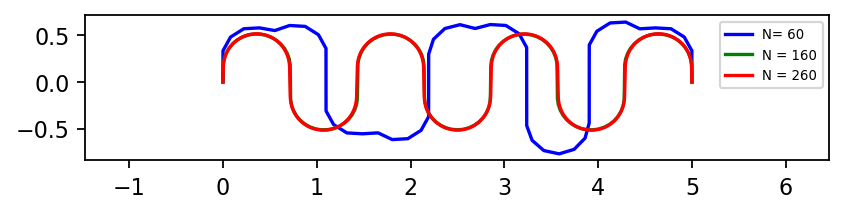

In [10]:
#on trace les courbes pour comparer
plt.figure(figsize = (6,1.2), dpi = 160)

plt.plot(x3, y3, '-b', label = 'N= 60')
plt.plot(x4, y4, '-g', label = 'N = 160')
plt.plot(x5, y5, '-r', label = 'N = 260')
# plt.plot([0], [0], 'or')
# plt.plot(x[N], y[N], 'og')
plt.legend(prop={'size': 6})
plt.axis('equal')

On peut observer plusieurs choses :
* La comparaison N=60 vs N=160 nous montre qu'augmenter N permet non seulement de lisser la courbe (plus de points utilisés : logique), mais aussi d'avoir un meilleur encombrement. 
* Cependant la comparaison N=160 vs N=260 montre que la remarque précédente est vraie dans une certaine mesure : comme les deux courbes sont quasi-identiques, augmenter N n'est pas nécéssaire et fait perdre du temps de calcul. 

Il y a donc un compromis à trouver.


### Question 9

In [11]:
#on compare les conditions initiales
N = 60
K = 10

#condition initiale ligne droite 
x0 = np.arange(0, L + eps, L/N)
y0 = np.zeros(N+1)


x6, y6 = solve(N, K, L, gamma, x0, y0)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      119

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

 151 1.9561122e+002 2.76e-004 1.48e+001  -1.7 1.71e-002   2.9 1.00e+000 1.00e+000f  1
 152 1.9474909e+002 2.43e-004 1.09e+002  -1.7 5.56e-002   2.4 1.00e+000 1.75e-001f  1
 153 1.9410615e+002 2.09e-004 1.54e+002  -1.7 1.25e-002   2.8 2.95e-001 6.85e-001f  1
 154 1.9316660e+002 1.03e-003 1.32e+002  -1.7 4.46e-002   2.3 2.24e-001 3.99e-001f  1
 155 1.9205756e+002 3.07e-004 7.46e+000  -1.7 1.27e-002   2.8 1.00e+000 1.00e+000f  1
 156 1.9135979e+002 6.87e-004 1.02e+001  -1.7 3.88e-002   2.3 5.13e-001 2.06e-001f  1
 157 1.8965410e+002 1.48e-003 1.31e+001  -1.7 7.28e-001   1.8 6.35e-002 9.15e-002f  1
 158 1.8717341e+002 1.27e-003 1.57e+002  -1.7 8.71e-002   2.2 1.00e+000 3.28e-001f  1
 159 1.8457506e+002 2.01e-004 1.40e+001  -1.7 3.01e-002   2.7 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160 1.8133916e+002 6.92e-004 3.33e+001  -1.7 8.28e-002   2.2 1.00e+000 4.57e-001f  1
 161 1.7986506e+002 5.68e-004 1.31e+002  -1.7 2.06e-001   1

 277 5.2163453e-001 2.35e-002 1.14e+000  -1.7 1.14e+000  -1.2 1.31e-001 1.67e-001f  1
 278 5.3969041e-001 3.10e-002 2.60e+000  -1.7 1.33e+000    -  1.16e-001 2.12e-001f  1
 279 5.3988420e-001 3.77e-002 3.84e+000  -1.7 1.85e+000    -  8.83e-002 1.76e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 5.3818560e-001 3.62e-002 3.67e+000  -1.7 1.18e+000  -0.8 2.03e-002 4.07e-002h  1
 281 4.9926664e-001 1.64e-002 3.09e+000  -1.7 1.87e-001   1.5 3.10e-001 6.11e-001f  1
 282 4.7743057e-001 9.71e-003 2.89e+000  -1.7 1.33e-001    -  1.00e+000 5.42e-001f  1
 283 4.5888166e-001 2.62e-003 5.55e-001  -1.7 8.04e-002    -  1.00e+000 1.00e+000f  1
 284 4.5720299e-001 2.29e-003 2.73e+000  -1.7 3.13e-001    -  9.21e-001 1.25e-001h  4
 285 4.5444907e-001 7.89e-005 9.86e-002  -1.7 9.29e-003   1.0 1.00e+000 1.00e+000h  1
 286 4.4179412e-001 8.20e-004 1.08e+000  -2.5 7.69e-002    -  8.97e-001 1.00e+000h  1
 287 4.4066270e-001 1.05e-003 7.92e-001  -2.5 4.84e-001    

 381 2.1345621e-001 3.81e-004 2.21e-002  -3.8 3.17e-002  -1.7 8.82e-001 1.00e+000h  1
 382 2.1332020e-001 4.42e-004 8.03e-002  -3.8 1.79e-001    -  3.02e-001 1.35e-001h  2
 383 2.1309707e-001 4.54e-004 1.23e-001  -3.8 8.40e-002  -2.2 9.21e-001 2.47e-001h  2
 384 2.1266345e-001 3.53e-004 2.76e-003  -3.8 3.51e-002  -1.7 1.00e+000 1.00e+000h  1
 385 2.1250065e-001 3.10e-004 7.25e-002  -3.8 7.41e-002  -2.2 6.33e-001 1.64e-001h  3
 386 2.1195293e-001 7.69e-005 8.70e-004  -3.8 2.00e-002  -1.8 1.00e+000 1.00e+000h  1
 387 2.1045130e-001 2.23e-004 6.71e-002  -5.7 3.87e-002    -  4.51e-001 6.73e-001h  1
 388 2.1007486e-001 2.85e-004 6.13e-001  -5.7 1.20e+000  -1.4 2.13e-001 1.23e-002h  1
 389 2.0827482e-001 1.89e-004 3.70e-001  -5.7 2.06e-002  -0.9 3.63e-001 7.64e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390 2.0758176e-001 3.27e-004 1.80e-001  -5.7 6.64e-002  -1.4 5.21e-001 3.49e-001h  1
 391 2.0660306e-001 1.82e-004 3.81e-002  -5.7 1.38e-002  -1

(-0.2501082767164596,
 5.252273811045651,
 -0.5493263563209294,
 0.5889095191330473)

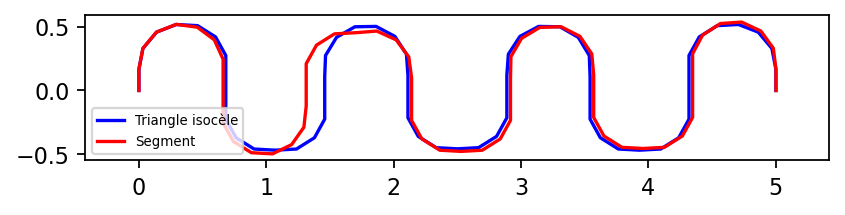

In [12]:
plt.figure(figsize = (6,1.2), dpi = 160)

plt.plot(x, y, '-b', label = 'Triangle isocèle')
plt.plot(x6, y6, '-r', label = 'Segment')
# plt.plot([0], [0], 'or')
# plt.plot(x[N], y[N], 'og')
plt.legend(prop={'size': 6})
plt.axis('equal')

On obtient deux courbes différentes, cela montre que que la solution de minimisation dépend de la condition initiale. Il y a donc plusieurs minimums. Cela est du au fait que l'ensemble d'intêret sous contrainte n'est pas convexe (seule possibilité, car la fonction est convexe). 

### Question 10

In [13]:
def solve_obstacle(N, K, L, gamma, x0, y0, xp, yp, R) :
    
    dx = L/N
    
    opti = casadi.Opti()
    x = opti.variable(N+1)
    y = opti.variable(N+1)
    
    #bulding f
    S = 0
    for i in range(N+1) :
        S += y[i]**2

    f = K*(x[N] - L/2)**2 + S * dx**2
    opti.minimize(f)

    #ceq
    opti.subject_to(x[0] == 0)
    opti.subject_to(y[0] == 0)
    opti.subject_to((x[1] - x[0])**2 + (y[1] - y[0])**2 - dx**2 == 0)
    
    #cineq
    opti.subject_to( y[1] >= 0)
    opti.subject_to( x[0] - x[1] <= 0)
    opti.subject_to((x[0] - xp)**2 + (y[0] - yp)**2 >= R**2 )
    opti.subject_to((x[N] - xp)**2 + (y[N] - yp)**2 >= R**2 )
    
    for i in range(1,N) :
        
        #ceq(bis)
        opti.subject_to( (x[i+1] - x[i])**2 + (y[i+1] - y[i])**2 - dx**2 == 0) 
        
        #cineq(bis)
        opti.subject_to( x[i] - x[i+1] <= 0)
        opti.subject_to((x[i+1] - 2 * x[i] + x[i-1])**2 + (y[i + 1] - 2* y[i]+ y[i-1])**2 - (dx**4)*(gamma**2) <= 0)
        opti.subject_to((x[i] - xp)**2 + (y[i] - yp)**2 >= R**2 )
    
    #solving
    opti.set_initial(x, x0)
    opti.set_initial(y, y0)
    opti.solver('ipopt')
    sol = opti.solve()
    return sol.value(x), sol.value(y)
    

Cette contrainte n'est evidement pas convexe (les points la vérifiant forment le plan privé d'un cercle). Cela ne change donc pas la caracteristique précédente (l'ensemble d'intêret sous contrainte n'est pas convexe), c'est même pire en rajoutant celle-ci. 

###  Question 11

In [15]:
N = 60
K = 10
L = 10
gamma = 3

xp = 2
yp = .2
R = .3

x0, y0 = generate_init_tri(N, L)
x7, y7 = solve_obstacle(N, K, L, gamma, x0, y0, xp, yp, R)

x0 = np.arange(0, L + eps, L/N)
y0 = np.zeros(N+1)

x8, y8 = solve_obstacle(N, K, L, gamma, x0, y0, xp, yp, R)


This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      597
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      181
        inequality constraints with only lower bounds:       62
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      119

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

Objective...............:  1.8090248594302299e-001   1.8090248594302299e-001
Dual infeasibility......:  5.6231963529995710e-012   5.6231963529995710e-012
Constraint violation....:  1.1232369201419345e-012   1.1232369201419345e-012
Complementarity.........:  9.0926826323150308e-010   9.0926826323150308e-010
Overall NLP error.......:  9.0926826323150308e-010   9.0926826323150308e-010


Number of objective function evaluations             = 124
Number of objective gradient evaluations             = 111
Number of equality constraint evaluations            = 124
Number of inequality constraint evaluations          = 124
Number of equality constraint Jacobian evaluations   = 111
Number of inequality constraint Jacobian evaluations = 111
Number of Lagrangian Hessian evaluations             = 110
Total CPU secs in IPOPT (w/o function evaluations)   =      0.163
Total CPU secs in NLP function evaluations           =      0.051

EXIT: Optimal Solution Found.
      solver  :   t_proc      (avg)  

 142 2.4974647e-001 2.36e-003 2.93e-001  -3.8 1.09e+000    -  2.31e-001 1.30e-001h  1
 143 2.4621179e-001 1.96e-003 2.18e-001  -3.8 6.69e-001  -2.3 1.95e-001 2.59e-001h  1
 144 2.4392409e-001 1.52e-003 1.60e-001  -3.8 5.87e-001    -  2.52e-001 2.33e-001h  1
 145 2.4144807e-001 3.18e-003 2.51e-001  -3.8 1.56e+000  -2.7 1.60e-001 3.44e-001f  1
 146 2.3965901e-001 2.85e-003 2.27e-001  -3.8 6.55e-001  -2.3 1.81e-001 1.27e-001h  1
 147 2.3868237e-001 2.74e-003 2.46e-001  -3.8 1.22e+000    -  1.15e-001 8.54e-002h  1
 148 2.3807193e-001 2.48e-003 2.01e-001  -3.8 7.10e-001  -2.8 6.83e-002 9.83e-002h  1
 149 2.3650753e-001 2.20e-003 1.60e-001  -3.8 7.33e-001    -  1.64e-001 1.14e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150 2.3646431e-001 1.98e-003 1.37e-001  -3.8 8.02e-001    -  6.59e-002 9.88e-002h  1
 151 2.3602492e-001 1.74e-003 1.77e-001  -3.8 2.93e-001  -2.4 3.58e-001 1.24e-001f  1
 152 2.3299765e-001 4.16e-004 8.73e-002  -3.8 1.64e-001  -1

In [16]:
def pot_de_fleur(xp, yp, R, N) :
    theta = np.pi*np.linspace(0, 2, N)
    x = xp + R*cos(theta)
    y = yp + R*sin(theta)
    return x, y
    
xc, yc = pot_de_fleur(2, .2, .3, 100)

(-0.2501429639115877, 5.25300224214334, -0.7217035784771575, 0.646134570022613)

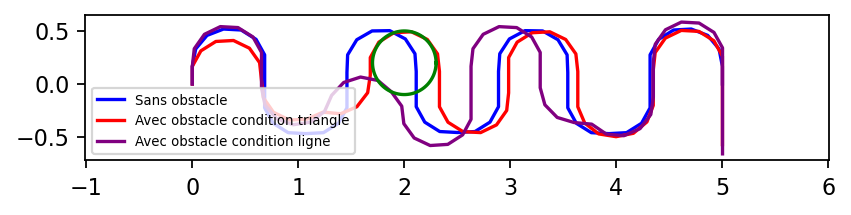

In [18]:
plt.figure(figsize = (6,1.2), dpi = 160)

plt.plot(x, y, '-b', label = 'Sans obstacle')
plt.plot(x7, y7, '-r', label = 'Avec obstacle condition triangle')
plt.plot(x8, y8, '-', color='purple', label = 'Avec obstacle condition ligne')
plt.plot(xc, yc, 'g')
plt.legend(prop={'size': 6})
plt.axis('equal')

Les résultats obtenus confirment notre analyse (l'ensemble d'intêret sous contraintes n'est pas convexe) : en ajoutant une contrainte supplémentaire non convexe, le résultat est encore plus flagrant : on obtient des solutions complètement différentes pour des conditions initiales différentes. A noter qu'avec la condition initiale triangle (qui passe au dessus du pot de fleur), l'encombrement est meilleur. 

###  Question 12

Comme à la question 2, rajouter le terme $ K_2 y_N^2 $ revient à ne pas considérer $ y_N = 0 $ dans la liste des contrainte tout en arrivant quasiment au même résultat. Cela permet d'alléger les contraintes sur la condition initiale et donc facilite la génération aléatoire de celle-ci.

In [ ]:
def solve_randominit(N, K1, K2, L, gamma, x0, y0) :#fonction de résolution
    
    dx = L/N
    
    opti = casadi.Opti()
    x = opti.variable(N+1) # l'utilisation de deux variables est plus clair qu'avec une seule mais ne change rien à la
    y = opti.variable(N+1) # généralité du problème
    
    #bulding f
    S = 0
    for i in range(N+1) :
        S += y[i]**2

    f = K1*(x[N] - 5)**2 + S * dx**2 + K2*y[N]
    opti.minimize(f)

    #ceq
    opti.subject_to(x[0] == 0)
    opti.subject_to(y[0] == 0)
    opti.subject_to((x[1] - x[0])**2 + (y[1] - y[0])**2 - dx**2 == 0)
    
    #cineq
    opti.subject_to( y[1] >= 0)
    opti.subject_to( x[0] - x[1] <= 0)
    
    for i in range(1,N) :
        
        #ceq(bis)
        opti.subject_to( (x[i+1] - x[i])**2 + (y[i+1] - y[i])**2 - dx**2 == 0) 
        
        #cineq(bis)
        opti.subject_to( x[i] - x[i+1] <= 0)
        opti.subject_to((x[i+1] - 2 * x[i] + x[i-1])**2 + (y[i + 1] - 2* y[i]+ y[i-1])**2 - (dx**4)*(gamma**2) <= 0)
    
    
    
    #solving
    opti.set_initial(x, x0)
    opti.set_initial(y, y0)
    opti.solver('ipopt')
    sol = opti.solve()
    return sol.value(x), sol.value(y)

Pour générer la condition initiale aléatoire tout en respectant la condition de distance et de croissance des $ x_i$ facilement on va construire la suite de points de façon récursive :

On pose : $ (x_0, y_0) = (0, 0)$

A chaque étape on génère de façon aléatoire un angle $\theta \in \left]-\frac{\pi}{2}, \frac{\pi}{2}\right[ $ et on pose $x_{i+1} = x_i + cos(\theta)dx $ et $y_{i+1} = y_i + sin(\theta)dx $.

La condition initiale formée, on lance l'algorithme de minimisation.
